In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
pd.read_csv("https://raw.githubusercontent.com/leoferres/gitiele356b/main/data/hdi.csv")
pd.read_csv("https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto80/vacunacion_comuna_1eraDosis.csv")
pd.read_csv("https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/input/InformeEpidemiologico/CasosFallecidosPorComuna.csv")
datos1=pd.read_csv("https://raw.githubusercontent.com/leoferres/gitiele356b/main/data/hdi.csv")
datos2=pd.read_csv("https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/input/InformeEpidemiologico/CasosFallecidosPorComuna.csv")
dosis=pd.read_csv("https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto80/vacunacion_comuna_1eraDosis.csv")

In [2]:
RMdosis=dosis[dosis['Region']=='Metropolitana']
RMdosis.head()

,Region,Codigo region,Comuna,Codigo comuna,Poblacion,2020-12-24,2020-12-25,2020-12-26,2020-12-27,2020-12-28,...,2021-07-02,2021-07-03,2021-07-04,2021-07-05,2021-07-06,2021-07-07,2021-07-08,2021-07-09,2021-07-10,2021-07-11
88,Metropolitana,13,Alhue,13502.0,7405.0,0.0,0.0,0.0,0.0,0.0,...,44.0,0.0,0.0,15.0,10.0,30.0,15.0,20.0,0.0,0.0
89,Metropolitana,13,Buin,13402.0,109641.0,0.0,0.0,0.0,0.0,0.0,...,464.0,188.0,0.0,301.0,250.0,668.0,436.0,251.0,0.0,0.0
90,Metropolitana,13,Calera de Tango,13403.0,28525.0,0.0,0.0,0.0,0.0,0.0,...,81.0,0.0,0.0,44.0,26.0,110.0,119.0,91.0,0.0,0.0
91,Metropolitana,13,Cerrillos,13102.0,88956.0,0.0,0.0,0.0,0.0,0.0,...,314.0,144.0,0.0,240.0,172.0,312.0,191.0,125.0,189.0,0.0
92,Metropolitana,13,Cerro Navia,13103.0,142465.0,0.0,0.0,0.0,0.0,0.0,...,563.0,298.0,44.0,489.0,387.0,378.0,272.0,206.0,476.0,210.0


In [3]:
datos2=datos2[datos2['Region']=='Metropolitana']
datos2=datos2.drop([152,153],axis=0)

In [4]:
data = datos2
data["TFallecidos"] = data["2021-07-09"]
data=data[['Codigo comuna','TFallecidos']]
data.head()

,Codigo comuna,TFallecidos
100,13502.0,13.0
101,13402.0,218.0
102,13403.0,45.0
103,13102.0,224.0
104,13103.0,563.0


In [5]:
col_list=list(RMdosis)
col_list.remove('Region')
col_list.remove('Codigo region')
col_list.remove('Comuna')
col_list.remove('Codigo comuna')
col_list.remove('Poblacion')
RMdosis=dosis[dosis["Region"].str.contains("Metropolitana")]
RMdosis=RMdosis.drop([140],axis=0)
RMdosis["TVacunados"] = RMdosis[col_list].sum(axis=1)
RMdosis=RMdosis[['Region','Comuna','Codigo comuna','Poblacion','TVacunados']]
RMdosis.head()

,Region,Comuna,Codigo comuna,Poblacion,TVacunados
88,Metropolitana,Alhue,13502.0,7405.0,6232.0
89,Metropolitana,Buin,13402.0,109641.0,74943.0
90,Metropolitana,Calera de Tango,13403.0,28525.0,21869.0
91,Metropolitana,Cerrillos,13102.0,88956.0,50012.0
92,Metropolitana,Cerro Navia,13103.0,142465.0,74917.0


In [6]:
newdatos=pd.merge(RMdosis,data,
how='inner', on='Codigo comuna')
datos1.rename(columns = {'comuna' : 'Codigo comuna'}, inplace = True)
datos= pd.merge(newdatos,datos1,how='inner', on='Codigo comuna')
datos.head()

,Region,Comuna,Codigo comuna,Poblacion,TVacunados,TFallecidos,LEI,II,EI,idh,HDI
0,Metropolitana,Alhue,13502.0,7405.0,6232.0,13.0,0.876923,0.756470,0.617345,NaN,0.742609
1,Metropolitana,Buin,13402.0,109641.0,74943.0,218.0,0.742570,0.822340,0.737301,NaN,0.766439
2,Metropolitana,Calera de Tango,13403.0,28525.0,21869.0,45.0,0.801109,0.760228,0.601466,NaN,0.715509
3,Metropolitana,Cerrillos,13102.0,88956.0,50012.0,224.0,0.782817,0.800343,0.713499,0.743,0.764616
4,Metropolitana,Cerro Navia,13103.0,142465.0,74917.0,563.0,0.752447,0.750382,0.657961,0.683,0.718874


In [7]:
mod = sm.OLS(datos.TFallecidos, datos.TVacunados)

res = mod.fit()

print(res.summary())

                                 OLS Regression Results                                
Dep. Variable:            TFallecidos   R-squared (uncentered):                   0.869
Model:                            OLS   Adj. R-squared (uncentered):              0.866
Method:                 Least Squares   F-statistic:                              338.1
Date:                Mon, 12 Jul 2021   Prob (F-statistic):                    3.72e-24
Time:                        21:55:58   Log-Likelihood:                         -343.44
No. Observations:                  52   AIC:                                      688.9
Df Residuals:                      51   BIC:                                      690.8
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [8]:
mod2 = sm.OLS(datos.TFallecidos, datos.HDI)

res2 = mod2.fit()

print(res2.summary())

                                 OLS Regression Results                                
Dep. Variable:            TFallecidos   R-squared (uncentered):                   0.612
Model:                            OLS   Adj. R-squared (uncentered):              0.604
Method:                 Least Squares   F-statistic:                              80.32
Date:                Mon, 12 Jul 2021   Prob (F-statistic):                    4.72e-12
Time:                        21:55:58   Log-Likelihood:                         -371.69
No. Observations:                  52   AIC:                                      745.4
Df Residuals:                      51   BIC:                                      747.3
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [88]:
FV_pred = res.predict(pd.DataFrame(datos.TVacunados))
FH_pred = res2.predict(datos.HDI)

Text(0, 0.5, 'Total Vacunados')

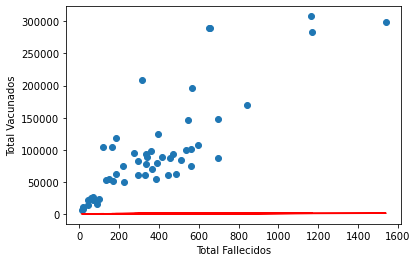

In [84]:
x= datos.TFallecidos
y= datos.TVacunados

plt.scatter(x,y)
plt.plot(pd.DataFrame(x),FV_pred ,c='red')
plt.xlabel('Total Fallecidos')
plt.ylabel('Total Vacunados')

Text(0, 0.5, 'HDI')

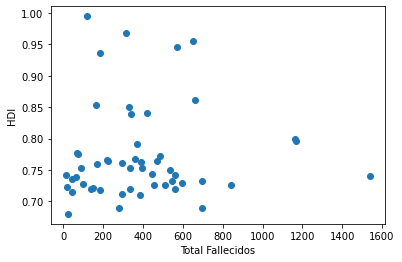

In [90]:
w= datos.TFallecidos
z= datos.HDI

plt.scatter(w,z)
#plt.plot(w,FH_pred ,c='red')
plt.xlabel('Total Fallecidos')
plt.ylabel('HDI')

In [89]:
print('Mediante los sumarios de las regreciones podemos ver que tiene mas incidencia las Vacunas ya que tiene un R2 mayor por lo cual es un modelo que se ajusta mucho mejor, se puede apreciar que las prob de F y Omnibus son similares a 0 lo cual nos muestra que tan ajustado a la realidad es el modelo. Dado los valores obtenidos podemos decir que la cantidad de Vacunados afecta la cantidad de fallecimientos de mayor manera que lo hace el HDI')

Mediante los sumarios de las regreciones podemos ver que tiene mas incidencia las Vacunas ya que tiene un R2 mayor por lo cual es un modelo que se ajusta mucho mejor, se puede apreciar que las prob de F y Omnibus son similares a 0 lo cual nos muestra que tan ajustado a la realidad es el modelo. Dado los valores obtenidos podemos decir que la cantidad de Vacunados afecta la cantidad de fallecimientos de mayor manera que lo hace el HDI
